In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [2]:
import datajoint_utils as du
import datajoint as dj

INFO - 2021-01-14 04:49:00,606 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-14 04:49:00,607 - settings - Setting database.user to celiib
INFO - 2021-01-14 04:49:00,608 - settings - Setting database.password to newceliipass
INFO - 2021-01-14 04:49:00,700 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-14 04:49:00,701 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-14 04:49:00,716 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-14 04:49:01,021 - settings - Setting enable_python_native_blobs to True


In [3]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-14 04:49:03,240 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-14 04:49:03,546 - settings - Setting enable_python_native_blobs to True


# Inspecting Deimation

In [17]:

"""864691135654122946
864691135583731320"""

minnie.Decimation() & dict(segment_id=864691135654122946)

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691135654122946,0,0.25,1829353,3693265,=BLOB=


In [18]:
minnie.Decimation() & dict(segment_id=864691135583731320)

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691135583731320,0,0.25,2710109,5474056,=BLOB=


In [19]:
minnie.Decimation() & dict(segment_id=864691135474614848)

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691135474614848,0,0.25,2377488,4762293,=BLOB=


# Inspecting Baylor Soma

In [20]:
((schema.jobs & "table_name='__baylor_segment_centroid'"))#.delete()#& "status='error'" & "key_hash='d97066fa7288bd42364bbdc01f5062b7'").delete()#.fetch1("key"))

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__baylor_segment_centroid,002d1754f817477b388ae89754951316,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.156,at-node29,19,35921,2021-01-14 13:15:52
__baylor_segment_centroid,00465d10aae39f80a748ff5dc0b72437,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,36053,2021-01-14 13:23:52
__baylor_segment_centroid,018353e2df71045e714cbabcb84c61c6,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.129,at-node2,19,37997,2021-01-14 08:58:01
__baylor_segment_centroid,019f1f77b4a17e38e79ed3f6a1d16ea8,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.164,at-node37,20,37894,2021-01-14 13:16:04
__baylor_segment_centroid,02215f334440dbb048ba5c459e0f08c0,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.168,at-node41,24,38140,2021-01-14 13:24:53
__baylor_segment_centroid,0265f2033d616e19e8fae8012d27086c,error,=BLOB=,Exception: neuron 864691135688142102 did not fix the manifold edges (meshlab script failed) with output:,=BLOB=,celiib@10.28.0.83,at-compute004,19,36067,2021-01-14 02:17:03
__baylor_segment_centroid,04add0cdb154e0b5c05d5f0c7a9a4bd2,reserved,=BLOB=,,=BLOB=,celiib@10.66.4.64,jr-compute001,19,38126,2021-01-14 13:23:53
__baylor_segment_centroid,050f9b0280495daf2ef2f079a58c6721,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.152,at-node25,19,35977,2021-01-14 13:15:22
__baylor_segment_centroid,05be65a239aeb96c628ce7a3226a511b,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.148,at-node21,19,36903,2021-01-14 08:59:44
__baylor_segment_centroid,05c99f5329b111da88fb0f359f97252f,error,=BLOB=,Exception: neuron 864691135968871013 did not fix the manifold edges (meshlab script failed) with output:,=BLOB=,celiib@10.28.0.148,at-node21,19,36092,2021-01-14 08:01:37


In [47]:
key_source =  (((minnie.Decimation & f"n_vertices > {verts_min}").proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}") & (dj.U("segment_id") & minnie.NucleiSegmentsRun2()))
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
864691134026921572,0,0.25
864691134141481226,0,0.25
864691134219060901,0,0.25
864691134221889045,0,0.25
864691134242673681,0,0.25
864691134252908410,0,0.25
864691134316523453,0,0.25
864691134351340112,0,0.25
864691134384033872,0,0.25
864691134391593458,0,0.25


In [57]:
len((dj.U("segment_id") & minnie.BaylorSegmentCentroid.proj()) & minnie.NucleiSegmentsRun2.proj())

76843

In [33]:
dj.U("segment_id") & minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation
864691134026921572
864691134141481226
864691134219060901
864691134221889045
864691134242673681
864691134252908410
864691134316523453
864691134351340112
864691134384033872
864691134391593458


In [16]:
(minnie.BaylorSegmentCentroid & minnie.MultiSomaProofread2.proj()).delete()

AssertionError: Declaration context is not set

# Checking multi-somas

In [87]:
one_soma_segment_ids = (dj.U("segment_id") & (minnie.BaylorSegmentCentroid() & "multiplicity = 1")).fetch("segment_id")
one_soma_segment_ids

array([864691134219060901, 864691134221889045, 864691134242673681, ...,
       864691137196930113, 864691137196930881, 864691137196931137])

In [94]:
import datajoint_utils as du

In [149]:
curr_index = -27
curr_segment_id = one_soma_segment_ids[curr_index]
curr_segment_id

864691137196922433

In [150]:
du.plot_decimated_mesh_with_somas(curr_segment_id)

Segment_id = 864691137196922433
vertices = 468787, faces= = 959349
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes = [<trimesh.Trimesh(vertices.shape=(16475, 3), faces.shape=(32352, 3))>]
other_meshes_to_plot = []


In [152]:
n_faces = (minnie.BaylorSegmentCentroid() & "multiplicity = 1").fetch("n_faces")

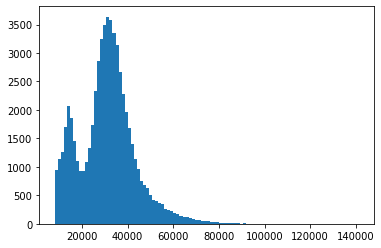

In [155]:
from matplotlib import pyplot as plt
_ = plt.hist(n_faces,bins=100)

In [158]:
 small_soma_ids = (minnie.BaylorSegmentCentroid() & "multiplicity = 1" & "n_faces<20000").fetch("segment_id")

In [170]:
du.plot_decimated_mesh_with_somas(small_soma_ids[-10])

Segment_id = 864691137196894273
vertices = 177486, faces= = 353560
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes = [<trimesh.Trimesh(vertices.shape=(5518, 3), faces.shape=(10645, 3))>]
other_meshes_to_plot = []


In [179]:
# Doing the bigger somas

big_soma_ids = (minnie.BaylorSegmentCentroid() & "multiplicity = 1" & "n_faces>60000").fetch("segment_id")
big_soma_ids.shape

(1428,)

In [183]:
du.plot_decimated_mesh_with_somas(big_soma_ids[-4])

Segment_id = 864691137019570286
vertices = 1181187, faces= = 2379931
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes = [<trimesh.Trimesh(vertices.shape=(45159, 3), faces.shape=(88772, 3))>]
other_meshes_to_plot = []


In [185]:
curr_soma = du.get_soma_mesh_list(big_soma_ids[-4])[0][0]
curr_soma

<trimesh.Trimesh(vertices.shape=(45159, 3), faces.shape=(88772, 3))>

In [186]:
import trimesh_utils as tu

In [189]:
div_meshes,div_meshes_sdf = tu.mesh_segmentation(curr_soma,clusters=4,smoothness=0.2)

In [192]:
import skeleton_utils as sk

In [195]:
ret_sk = sk.skeletonize_connected_branch_meshparty(curr_soma)
nviz.plot_objects(skeletons = [ret_sk],
                 meshes=[curr_soma])

  0%|          | 0/3 [00:00<?, ?it/s]

invalidation_d = 12000
cc_vertex_thresh = 10


 33%|███▎      | 1/3 [00:00<00:00,  2.88it/s]

100%|██████████| 3/3 [00:00<00:00,  7.08it/s]

branches_touching_root = [5]


In [191]:
nviz.plot_objects(div_meshes[0])

In [190]:
nviz.plot_objects(meshes=div_meshes,
                 meshes_colors="random")

In [261]:
nviz.plot_objects(curr_soma)

In [263]:
import trimesh_utils as tu

In [264]:
tu.is_manifold(curr_soma)

False

In [267]:
from importlib import reload
tu = reload(tu)

In [268]:
curr_soma_poisson_meshes = tu.poisson_surface_reconstruction(curr_soma,return_significant_meshes=True,
                                                     significant_mesh_threshold=1000)
curr_soma_poisson_meshes

xvfb-run -n 2024 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Preprocessing_Pipeline/temp/mesh_41.off -o /notebooks/Auto_Proofreading/Preprocessing_Pipeline/temp/mesh_41_poisson.off -s /notebooks/Auto_Proofreading/Preprocessing_Pipeline/temp/poisson_645153.mls
removed temporary input file: /notebooks/Auto_Proofreading/Preprocessing_Pipeline/temp/mesh_41.off
removed temporary output file: /notebooks/Auto_Proofreading/Preprocessing_Pipeline/temp/mesh_41_poisson.off


[<trimesh.Trimesh(vertices.shape=(168004, 3), faces.shape=(336004, 3))>]

In [269]:
curr_soma

<trimesh.Trimesh(vertices.shape=(45159, 3), faces.shape=(88772, 3))>

In [272]:
poisson_mesh = curr_soma_poisson_meshes[0]
tu.is_manifold(poisson_mesh)

True

In [273]:
import skeleton_utils as sk

In [280]:
poisson_sk = sk.skeleton_cgal(poisson_mesh,
                verbose=True,
                             min_edge_length=1000)

min_edge_length = 1000
Total time for skeletonizing 23.694881677627563
Returning skeleton of size (15, 2, 3)


In [281]:
nviz.plot_objects(poisson_mesh,
                 skeletons=[poisson_sk])

In [270]:
nviz.plot_objects(curr_soma_poisson_meshes[0])

# Inspecting Decomposition

In [201]:
np.unique((schema.jobs & "table_name='__decomposition'").fetch("error_message"))

array(['',
       "DataJointError: A different version of '864691134221889045_0_25.pbz2' has already been placed.",
       'Exception: Branch that we are skipping is too large with skip distance: 26840.28244673132',
       'Exception: Mesh passed to correspondence_1_to_1 is not just one mesh',
       'Exception: Something went wrong in the connectivity',
       'Exception: The number of nodes in the concept graph and number of branches passed to it did not match\nlen(curr_limb_concept_network.nodes())=103, len(curr_limb_divided_skeletons)= 104',
       'Exception: The number of nodes in the concept graph and number of branches passed to it did not match\nlen(curr_limb_concept_network.nodes())=11, len(curr_limb_divided_skeletons)= 12',
       'Exception: The number of nodes in the concept graph and number of branches passed to it did not match\nlen(curr_limb_concept_network.nodes())=12, len(curr_limb_divided_skeletons)= 13',
       'Exception: The number of nodes in the concept graph an

In [240]:
seg_ids_non_soma = (minnie.Decomposition() & "n_not_processed_soma_containing_meshes=1").fetch("segment_id")

In [282]:
len(minnie.Decomposition())

30667

In [215]:
decimation_version = 0
decimation_ratio = 0.25
# key_source = (minnie.Decimation().proj(decimation_version='version')  & 
#                   dict(decimation_version=decimation_version,decimation_ratio=decimation_ratio)  
#                   & minnie.MultiSomaProofread2() & (dj.U("segment_id") & (minnie.BaylorSegmentCentroid()).proj()))

key_source = ((minnie.Decimation).proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}" &  (minnie.BaylorSegmentCentroid() & "multiplicity>0" & "multiplicity<4"))
                                                                  
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
864691134219060901,0,0.25
864691134221889045,0,0.25
864691134242673681,0,0.25
864691134252908410,0,0.25
864691134316523453,0,0.25
864691134384033872,0,0.25
864691134391593458,0,0.25
864691134409056935,0,0.25
864691134428609977,0,0.25
864691134441691943,0,0.25


In [71]:
minnie.Decomposition() & "n_limbs>8"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134884741370,0,0.25,30.00,0,0,1,=BLOB=,380482,782797,0,0,0,0,1,9,155,111,4957951.094062191,3258375.4424227052,18747.22,86.29,86.29,304.834,264.235,888,0.0001791062443240916,5.7290322580645165,2182315.787,47,0.000406907197065518,18.894,246174952917.70355,148392566.49754968,49652.55772944815,112804.4595489624,5237764955.69582,2997.7505
864691134884744698,0,0.25,30.00,0,0,1,=BLOB=,304543,628181,0,0,0,0,1,10,45,19,2572240.2636876525,859945.1719564002,47557.428,371.006,303.317,598.593,506.099,1394,0.000541940043346306,30.977777777777778,2502807.014,41,0.0005569746257711263,34.0,245013023955.07565,123742902.31608549,95252.77533904104,97895.29219973476,5975927413.53843,1616.7387
864691134884748026,0,0.25,30.00,0,0,1,=BLOB=,420027,845933,0,0,0,0,1,9,83,29,4264839.614019831,1233064.320639635,34585.162,266.767,240.558,445.096,432.024,1837,0.00043073132081244503,22.132530120481928,3126272.098,52,0.0005876008045413582,35.327,455990220238.503,167251658.6566677,106918.49202008062,145857.49606703073,8769042696.894289,2258.0372
864691134884749306,0,0.25,30.00,0,0,1,=BLOB=,128236,263233,0,0,0,0,1,11,123,69,2825436.2442786554,1960400.1846538119,15389.194,68.438,68.438,151.048,151.048,1,3.5392764640325616e-07,0.008130081300813009,92419.698,14,1.082020415171666e-05,0.071,343257071.9985161,343257071.9985161,121.48816760370784,3714.1115955444484,24518362.28560829,299.2331
864691134884749562,0,0.25,30.00,0,0,1,=BLOB=,601749,1218939,0,0,0,0,1,9,222,81,9300257.982468953,3628687.696599574,27525.157,81.04,81.04,347.243,312.489,1303,0.000140103640399671,5.86936936936937,3473456.532,60,0.00037513064810105416,21.717,153643447566.38287,56863176.80465126,16520.3425384545,44233.588689222976,2560724126.1063814,2454.3775
864691134884751866,0,0.25,30.00,0,0,1,=BLOB=,133028,266987,0,0,0,0,1,12,146,53,3165582.065360753,1534226.1075221612,14816.126,76.707,76.707,160.869,160.869,0,0

In [79]:
minnie.Decomposition() & "n_somas > 2"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134884769018,0,0.25,30.00,0,0,1,=BLOB=,1528011,3078802,0,7,5,2,3,20,421,129,15358033.818095537,6359831.284514944,19558.966,117.674,117.674,462.331,428.373,3853,0.0002508784682750353,9.152019002375297,8180017.673,186,0.00047102587720778387,20.715,818307027581.6089,118226275.54461034,53282.01755991983,100037.31780221165,4399500148.288219,8443.518
864691134884780794,0,0.25,30.00,0,0,1,=BLOB=,681209,1398786,0,3,2,2,3,11,233,92,7885636.26483033,3525507.8928005793,19971.03,103.952,103.952,473.694,441.382,1882,0.00023866178159822767,8.07725321888412,3342305.966,105,0.0005630842954370025,17.924,351748824256.1687,93978369.95831957,44606.27049524926,105241.35965838404,3349988802.439702,3003.3271
864691134947446012,0,0.25,30.00,0,0,1,=BLOB=,1533949,3083820,0,4,2,3,3,15,407,121,14551799.145926123,5257863.902275589,19777.187,255.851,240.266,531.752,513.253,6264,0.00043046223612519074,15.390663390663391,10084186.037,265,0.000621170610797608,23.638,984943846476.0198,73484385.19085026,67685.3656787698,97672.12176194997,3716769231.98498,7167.7807
864691134964424479,0,0.25,30.00,0,0,1,=BLOB=,963882,1956436,0,3,0,3,3,20,255,43,9501773.837251363,2031206.9176922876,24472.749,233.081,227.948,487.938,461.487,3659,0.0003850859915919091,14.349019607843138,7181599.939,165,0.000509496495360266,22.176,531987450744.69336,84445028.24019113,55988.2249205991,74076.45305549697,3224166368.149657,4064.355
864691135012361718,0,0.25,30.00,0,0,1,=BLOB=,1136515,2273230,0,2,1,2,3,18,476,310,16637504.667719828,9720047.043807274,24658.452,95.525,95.525,310.964,297.902,2129,0.00012796390098875204,4.472689075630252,7296919.847,152,0.0002917669434008242,14.007,336279375060.5924,72137347.02216592,20212.128067079877,46085.11291224444,2212364309.6091604,6327.7209
864691135012437750,0,0.25,30.00,0,0,1,=BLOB=,765481,1579185,0,1,1,1,3,3,215,195,7716296.078214913,7238487.403902148,21206.537,118

In [11]:
# minnie.Decomposition.drop()
# schema.external['decomposition'].delete(delete_external_files=True)

`microns_minnie65_02`.`__decomposition` (121 tuples)
Proceed? [yes, No]: yes


INFO - 2021-01-14 05:02:55,202 - table - Dropped table `microns_minnie65_02`.`__decomposition`


Tables dropped.  Restart kernel.


In [45]:
from datajoint_utils import *

In [ ]:
(minnie.Decomposition() & "n_somas>1") & (minnie.NeuronGliaNuclei() & "n_glia_faces>0")

In [ ]:
((schema.jobs & "table_name='__decomposition'") & "status='error'")#.delete()

In [252]:
curr_segment_id = seg_ids_non_soma[-50]
curr_segment_id

864691135526084699

In [258]:
minnie.NeuronGliaNuclei() & dict(segment_id=curr_segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia (external storage),n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei (external storage)
864691135526084699,0,0.25,30.00,2900725,=BLOB=,66589,=BLOB=


In [254]:
neuron_obj = (minnie.Decomposition & dict(segment_id=curr_segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [255]:
import neuron_visualizations as nviz

In [256]:
curr_somas = du.get_soma_mesh_list(curr_segment_id)
curr_somas

[[<trimesh.Trimesh(vertices.shape=(25861, 3), faces.shape=(51199, 3))>,
  <trimesh.Trimesh(vertices.shape=(18119, 3), faces.shape=(41623, 3))>,
  <trimesh.Trimesh(vertices.shape=(6525, 3), faces.shape=(12586, 3))>],
 array([1212.7993, 1212.7993, 1212.7993]),
 array([0.664, 0.607, 0.763])]

In [260]:
neuron_obj.segment_id

864691135526084699

In [257]:
nviz.plot_objects(neuron_obj.not_processed_soma_containing_meshes[0],
                  meshes=curr_somas[0],
                 meshes_colors="red")

In [259]:
import trimesh_utils as tu

In [ ]:
tu.combine_meshes

In [251]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                     limb_branch_dict="all")


 Working on visualization type: mesh


In [ ]:
import proofreading_utils as pru

In [ ]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj)

In [ ]:
seperated_neurons_list= pru.split_neuron(neuron_obj = neuron_obj,
                limb_results=limb_results,
                plot_seperated_neurons=True)

In [ ]:
curr_limb = seperated_neurons_list[0][0]

In [ ]:
curr_limb.get_branch_names()

In [ ]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [ ]:
curr_limb = neuron_obj[0]

In [ ]:
 (74,61)

In [ ]:
import networkx as nx
nx.shortest_path(curr_limb.concept_network,74,61)

In [ ]:
import neuron_utils as nru

In [ ]:
points_to_show = nru.skeleton_points_along_path(curr_limb,branch_path=[74, 73, 36, 34, 28, 21, 32, 41, 54, 55, 58, 61],
                              skeletal_distance_per_coordinate = 5000)
points_to_show

In [ ]:
nviz.plot_objects(skeletons=[curr_limb.skeleton],
                 meshes=[neuron_obj["S0"].mesh,neuron_obj["S1"].mesh],
                 scatters=[points_to_show])

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True,
                      subtract_glia=False
                     )

In [ ]:
import neuron_visualizations as nviz
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_whole_neuron=True,
                     subtract_glia=True)

In [ ]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [ ]:
pru.split_info_to_neuroglancer_link(segment_id=neuron_obj.segment_id,
                                   split_info=limb_results,
                                   output_type='server')

# Inspecting Split Suggestions

In [9]:
#minnie.NeuronSplitSuggestions.drop()

`microns_minnie65_02`.`__neuron_split_suggestions` (107 tuples)
Proceed? [yes, No]: yes


INFO - 2021-01-14 05:02:11,151 - table - Dropped table `microns_minnie65_02`.`__neuron_split_suggestions`


Tables dropped.  Restart kernel.


In [ ]:
minnie,schema = du.configure_minnie_vm()

In [ ]:
minnie.NeuronSplitSuggestions() & "segment_id=864691135847950686"

In [ ]:
(schema.jobs & "table_name='__neuron_split_suggestions'")# & "status='error'"

In [ ]:
limb_results = (minnie.NeuronSplitSuggestions() & dict(segment_id=864691135065033540)).fetch1("split_results")

In [ ]:
pru.split_info_to_neuroglancer_link(864691135065033540,split_info=limb_results,output_type="server")

In [4]:
du.create_suggested_splits_neuroglancer_spreadsheet(output_filename='allen_spreadsheet_transparent_paths.csv',
                                                   output_type="server")

segment_id = 864691134947393276
segment_id = 864691135012471798
segment_id = 864691135012571126
segment_id = 864691135012905110
segment_id = 864691135065018692
segment_id = 864691135065024068
segment_id = 864691135065032772
segment_id = 864691135065033540
segment_id = 864691135081745143
segment_id = 864691135155574372
segment_id = 864691135210051520
segment_id = 864691135274155493
segment_id = 864691135291777462
segment_id = 864691135291788214
segment_id = 864691135337764326
segment_id = 864691135341171909
segment_id = 864691135345134239
segment_id = 864691135345274271
segment_id = 864691135345276831
segment_id = 864691135348374487
segment_id = 864691135360133191
segment_id = 864691135373423816
segment_id = 864691135382504922
segment_id = 864691135382996203
segment_id = 864691135385192277
segment_id = 864691135385207893
segment_id = 864691135394014197
segment_id = 864691135403709422
segment_id = 864691135407333321
segment_id = 864691135428492848
segment_id = 864691135440515912
segment_

In [ ]:
debug

In [ ]:
neuron_obj.save_compressed_neuron?

In [ ]:
import datajoint_utils as du

In [ ]:
minnie,schema = du.configure_minnie_vm()

In [ ]:
import datajoint_utils as du

In [ ]:
minnie.Decom